# Required Code File to Run
```python
import datetime
import requests
import os
import re

def scrape_noaa_buoycams(image_directory):
    # URL of the buoycam image should be like this https://www.ndbc.noaa.gov/buoycam.php?station=42039
    buoycam_url = "https://www.ndbc.noaa.gov/buoycam.php?station={buoycam_id}"

    # List of buoycam IDs
    buoycam_ids = ["45007", "45012", "46002", "46011", "46012", "46015", "46025", "46026", "46027", "46028", "46042", "46047", "46053", "46054", "46059", "46066", "46069", "46071", "46072", "46078", "46085", "46086", "46087", "46088", "46089", "51000", "51001", "51002", "51003", "51004", "51101", "46084"]
    # Create the image directory if it doesn't exist
    os.makedirs(image_directory, exist_ok=True)

    # Scrape images from each buoycam
    for buoycam_id in buoycam_ids:
        # Construct the URL for the buoycam image
        url = buoycam_url.format(buoycam_id=buoycam_id)

        # Send a GET request to retrieve the image data
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            timedateofimage = datetime.datetime.utcnow().strftime("%Y%m%d%H%M%S")
            # Convert the timedateofimage to Zulu snake case format
            zulu_snakecased_time = re.sub(r'[^a-zA-Z0-9]', '_', timedateofimage)

            # Save the image to the image directory
            # Save the image with the Zulu snakecased timecode
            image_path = os.path.join(image_directory, f"{buoycam_id}/{buoycam_id}_{zulu_snakecased_time}.jpg")

            with open(image_path, "wb") as f:
                f.write(response.content)
            print(f"Image saved: {image_path}")
        else:
            print(f"Failed to retrieve image from buoycam {buoycam_id}")

# Example usage
image_directory = "images/buoys"

scrape_noaa_buoycams(image_directory)
```

In [55]:
import pandas as pd


import the buoy list
from data/buoy_list.csv

In [56]:
buoy_list = pd.read_csv('../data/buoys.csv')
# get the list of buoys
buoy_list.columns
# buoy_list = buoy_list['buoy_id'].tolist()
# buoy_list.head()
# drop Unnamed: 1 column
buoy_list = buoy_list.drop(columns=['Unnamed: 1'])
# get the list of buoys
# define the column names
buoy_list.columns = ['buoy_id']
# get the list of buoys
buoy_list = buoy_list['buoy_id'].tolist()
print(buoy_list[0:10])

[42001, 46059, 41044, 46071, 42002, 46072, 46066, 41046, 46088, 44066]


In [57]:
buoy_locs = pd.read_csv("../data/buoy_id_to_lat_lon.csv")
# add header to buoy_locs
buoy_locs.columns = ['buoy', 'coords']

# merge the two dataframes
# the coords is a list of two numbers, the lat and lon
# split the coords into two columns and add them to the buoy_locs dataframe
# buoy_locs[['lat', 'lon']] = pd.DataFrame(buoy_locs.coords.tolist(), index=buoy_locs.index)
# buoy_locs = buoy_locs.drop(columns=['coords'])
# get the numbers
# buoy_locs.head()
import re
buoy_locs.head()
# for every row use regex to split the coords into two columns and add them to the buoy_locs dataframe
for index, row in buoy_locs.iterrows():
    # print(row['coords'])
    lat = re.findall(r"[-+]?\d*\.\d+|\d+", row['coords'])[0]
    lon = re.findall(r"[-+]?\d*\.\d+|\d+", row['coords'])[1]
    buoy_locs.at[index, 'lat'] = lat
    buoy_locs.at[index, 'lon'] = lon
# drop the coords column
buoy_locs = buoy_locs.drop(columns=['coords'])
# get the numbers
buoy_locs.head()

,buoy,lat,lon
0,46072,51.666,-172.114
1,46088,48.332,-123.179
2,51000,23.528,-153.792
3,42020,26.968,-96.693
4,46028,35.770,-121.903


In [58]:
# load up the optimal buoy locations from optimal_shot_times.csv
optimal_buoy_locs = pd.read_csv("../data/optimal_shot_times.csv")
# add header to optimal_buoy_locs
optimal_buoy_locs.head()
# column Time is in UTC time



,Time,Buoy ID,Time.1
0,2310,42002,11:10:10 PM
1,2210,42059,10:10:10 PM
2,2210,44007,10:10:10 PM
3,2210,44007,10:10:10 PM
4,2210,44013,10:10:10 PM


In [59]:
# Create a list of phrases for the main page to display on the ticker
phrase_partone = 'Looking at Buoy {}'.format(buoy_list[index]) # where index is a random id from the list of buoys
phrase_parttwo = 'The optimal time to shoot is {}'.format(optimal_buoy_locs['Time'][index]) # where index is a random id from the list of buoys
phrase_partthree = 'The optimal time to shoot is {}'.format(optimal_buoy_locs['Time'][index]) # where index is a random id from the list of buoys
import random
phrases = [] # create an empty list
# populate the list with 100 random phrases
for i in range(100):
    index = random.randint(0, len(buoy_list)-1)
    phrase_partone = 'Looking at Buoy {}'.format(buoy_list[index]) # where index is a random id from the list of buoys
    phrase_parttwo = 'watch {} at {}'.format(index,optimal_buoy_locs['Time'][index]) # where index is a random id from the list of buoys
    phrase_partthree = 'sunset for {} is {}'.format(index,optimal_buoy_locs['Time'][index]) # where index is a random id from the list of buoys
    # randomly choose one of the three phrases to add to the list
    phrase = random.choice([phrase_partone, phrase_parttwo, phrase_partthree])
    # replace all spaces with "+" and end all the phrases with a';'
    phrase = phrase.replace(" ", "+") + ";"
    phrases.append(phrase)


# replace all spaces with "+" and end all the phrases with a';'
# save the phrases to a file 'ticker_phrases.txt'

master_phrase = ""
for phrase in phrases:
    master_phrase += phrase


# save master_phrase to a file 'ticker_phrases.txt'
with open('../data/ticker_phrases.txt', 'w') as f:
    f.write(master_phrase)




In [60]:
# Tapestry Weaver Function
import numpy as np


def update_tapestry(tapestry_image,new_row):
    # using cv2 to add the new row to the tapestry image
    # if the tapestry image is more than 100 rows tall, delete the top row and add the new row to the bottom
    # if the tapestry image is less than 100 rows tall, add the new row to the bottom
    # return the updated tapestry image
    
    # get the height and width of the tapestry image
    height, width, channels = tapestry_image.shape
    # if the tapestry image is more than 100 rows tall, delete the top row and add the new row to the bottom
    if height > 100:
        # delete the top row
        tapestry_image = tapestry_image[1:height, 0:width]
        # add the new row to the bottom
        tapestry_image = np.vstack((tapestry_image, new_row))
    # if the tapestry image is less than 100 rows tall, add the new row to the bottom
    else:
        tapestry_image = np.vstack((tapestry_image, new_row))
    return tapestry_image



In [61]:
# function to parse the images/buoys directory and return only the set of most recent unique images from the directory
import os
import re
import datetime
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import time
import glob
import shutil
import requests
import json
import urllib.request

def get_newest_images():
    # parse the images/buoys directory and return only the set of most recent unique images from the directory
    # get the list of files in the images/buoys directory
    files = glob.glob('../images/buoys/*')
    # get the list of unique buoys
    buoys = []
    for file in files:
        buoy = file.split('/')[-1].split('_')[0]
        buoys.append(buoy)
    buoys = list(set(buoys))
    # get the most recent image for each buoy
    newest_images = []
    for buoy in buoys:
        # get the list of files for this buoy
        buoy_files = glob.glob('../images/buoys/{}*'.format(buoy))
        # get the most recent file
        newest_file = max(buoy_files, key=os.path.getctime)
        newest_images.append(newest_file)
    return newest_images

def parse_the_newest_images(newest_images):
    # check the newest images to see if any of the buoys are in the optimal shot times
    # if they are, add them to the list of buoys to be added to the tapestry
    # return the list of buoys to be added to the tapestry
    
    # get the list of buoys from the newest images
    buoys = []
    for file in newest_images:
        buoy = file.split('/')[-1].split('_')[0]
        buoys.append(buoy)
    # get the list of optimal buoys
    optimal_buoys = optimal_buoy_locs['Buoy ID'].tolist()
    # get the list of buoys to be added to the tapestry
    buoys_to_add = []
    for buoy in buoys:
        if buoy in optimal_buoys:
            buoys_to_add.append(buoy)
    return buoys_to_add

def parse_older_images(all_images):
    # check the older images to see if any of the buoys are in the optimal shot times
    # if they are, add them to the list of buoys to be added to the tapestry
    # return the list of buoys to be added to the tapestry
    
    # get the list of buoys from all the image files
    buoys = []
    for file in all_images:
        buoy = file.split('/')[-1].split('_')[0]
        buoys.append(buoy)
    # get the list of optimal buoys
    optimal_buoys = optimal_buoy_locs['Buoy ID'].tolist()
    # get the list of buoys to be added to the tapestry
    buoys_to_add = []
    for buoy in buoys:
        if buoy in optimal_buoys:
            buoys_to_add.append(buoy)

    print("buoys_to_add: {}".format(buoys_to_add))
    return buoys_to_add

def parse_any_buoy_images(all_files):
    # just get all the images from the images/buoys directory and return one from each buoy
    # get the list of unique buoys
    buoys = []
    for file in all_files:
        buoy = file.split('/')[-1].split('_')[0]
        buoys.append(buoy)
    buoys = list(set(buoys))
    # get one image from each buoy
    buoy_images = []
    final_images = []
    for buoy in buoys:
        # get the list of files for this buoy
        buoy_files = glob.glob('../images/buoys/{}*'.format(buoy)) # this is a list of folders i.e. ['../images/buoys/44011_2019-07-01_12-00-00', '../images/buoys/44011_2019-07-01_12-00-00'] These folders contain the images
        # get the most recent file
        for buoy_file in buoy_files:
            buoy_images.append(buoy_file) # this is a list of images i.e. ['../images/buoys/44011_2019-07-01_12-00-00/44011_2019-07-01_12-00-00_0.jpg', '../images/buoys/44011_2019-07-01_12-00-00/44011_2019-07-01_12-00-00_1.jpg']
        # get a random file
        random_file = random.choice(buoy_images)
        final_images.append(random_file)
    return final_images

def generate_the_first_tapestry():
    # create a new tapestry image and save it to the images/tapestry directory
    # make it blank for now
    # return the tapestry image
    # create a blank tapestry image
    tapestry_image = np.zeros((100, 100, 3), np.uint8)
    # save the tapestry image to the images/ directory
    cv2.imwrite('../images/tapestry.png', tapestry_image)
    return tapestry_image

def add_buoys_to_tapestry(buoys_to_add):
    # add the buoys to the tapestry
    # return the updated tapestry image
    # print("buoys_to_add: {}".format(buoys_to_add))
    # get the list of files in the images/buoys directory
    files = glob.glob('../images/buoys/*')
    # get the list of unique buoys
    buoys = []
    for file in files:
        buoy = file.split('/')[-1].split('_')[0]
        buoys.append(buoy)
    buoys = list(set(buoys))
    # get the most recent image for each buoy
    newest_images = []
    for buoy in buoys:
        # get the list of files for this buoy
        buoy_files = glob.glob('../images/buoys/{}*'.format(buoy))
        # get the most recent file
        newest_file = max(buoy_files, key=os.path.getctime)
        newest_images.append(newest_file)
    # get the list of optimal buoys
    optimal_buoys = optimal_buoy_locs['Buoy ID'].tolist()
    # get the list of buoys to be added to the tapestry
    buoys_to_add = []
    for buoy in buoys:
        if buoy in optimal_buoys:
            buoys_to_add.append(buoy)
    # add the buoys to the tapestry
    # get the tapestry image
    tapestry_image = cv2.imread('../images/tapestry.png')
    # get the height and width of the tapestry image
    try:
        height, width, channels = tapestry_image.shape
    except:
        height = 100
        width = 100
        
    # for each buoy to add to the tapestry
    for buoy in buoys_to_add:
        # get the image for the buoy
        buoy_image = cv2.imread('../images/buoys/{}_2019-05-01_00:00:00.png'.format(buoy))
        # resize the image to the width of the tapestry
        buoy_image = cv2.resize(buoy_image, (width, height))
        # add the buoy image to the tapestry image
        tapestry_image = update_tapestry(tapestry_image, buoy_image)
    # save the tapestry image
    cv2.imwrite('../images/tapestry.png', tapestry_image)
    return tapestry_image

def get_tapestry_image():
    # get the tapestry image
    tapestry_image = cv2.imread('../images/tapestry.png')
    return tapestry_image

def get_buoys_to_add():
    # get the list of files in the images/buoys directory
    files = glob.glob('../images/buoys/*')
    # get the list of unique buoys
    buoys = []
    for file in files:
        buoy = file.split('/')[-1].split('_')[0]
        buoys.append(buoy)
    buoys = list(set(buoys))
    # get the most recent image for each buoy
    newest_images = []
    for buoy in buoys:
        # get the list of files for this buoy
        buoy_files = glob.glob('../images/buoys/{}*'.format(buoy))
        # get the most recent file
        newest_file = max(buoy_files, key=os.path.getctime)
        newest_images.append(newest_file)
    # get the list of optimal buoys
    optimal_buoys = optimal_buoy_locs['Buoy ID'].tolist()
    # get the list of buoys to be added to the tapestry
    buoys_to_add = []
    for buoy in buoys:
        if buoy in optimal_buoys:
            buoys_to_add.append(buoy)
    return buoys_to_add


def process_flow():
    # use the functions above in the correct order to process the flow
    # save the updated tapestry image to the images directory as tapestry.png
    # if there is no tapestry image, create one
    # if there are no images in the images/buoys directory, do nothing
    
    # get the list of files in the images/buoys directory
    files = glob.glob('../images/buoys/*')
    # if there are no files in the images/buoys directory, do nothing
    if len(files) == 0:
        print("No files in the images/buoys directory")
        return
    # if there is no tapestry image, create one
    if not os.path.isfile('../images/tapestry.png'):
        print("No tapestry image")
        generate_the_first_tapestry()
    # get the list of buoys to add to the tapestry
    buoys_to_add = get_buoys_to_add()
    # add the buoys to the tapestry
    add_buoys_to_tapestry(buoys_to_add)
    # get the tapestry image
    tapestry_image = get_tapestry_image()
    # save the tapestry image
    cv2.imwrite('../images/tapestry.png', tapestry_image)
    return




In [62]:
def crop_out_the_bottom(image):
    # there is a black bar at the bottom of the image that needs to be cropped out
    # return the cropped image
    # get the height and width of the image
    height, width, channels = image.shape
    # crop out the bottom 20 pixels
    image = image[0:height-25, 0:width]
    return image

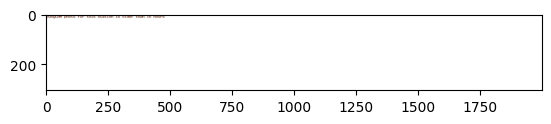

In [63]:
# test the crop_out_the_bottom function on one random image from the images/buoys directory
# get the list of files in the images/buoys directory
files = glob.glob('../images/buoys/*/*')
# get a random file
file = random.choice(files)
# read the image
image = cv2.imread(file)
# crop out the bottom
image = crop_out_the_bottom(image)
# show the image
plt.imshow(image)

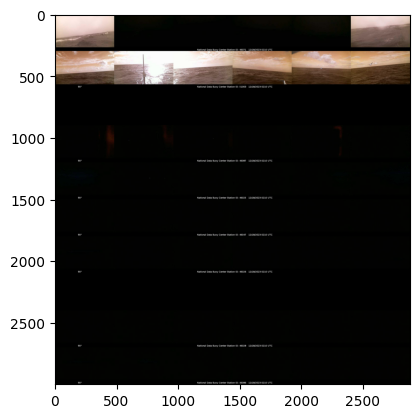

In [64]:
# grab ten random images from the images/buoys directory
ten_randos = random.sample(glob.glob('../images/buoys/*/*'), 10)

# with cv2 put the images in a grid with one column and ten rows and save the image as 'tapestry.png' in the images directory
# get the height and width of the first image
height, width, channels = cv2.imread(ten_randos[0]).shape
# height -= 25 # crop out the bottom 25 pixels
# create a blank image
blank_image = np.zeros((height*10, width, channels), np.uint8)
# for each image
for i in range(len(ten_randos)):
    try:
        # get the image
        image = cv2.imread(ten_randos[i])
        # crop out the bottom
        # image = crop_out_the_bottom(image)
        # add the image to the blank image
        blank_image[i*height:(i+1)*height, 0:width] = image
    except:
        pass
# save the blank image
cv2.imwrite('../images/tapestry.png', blank_image)
# show the blank image
plt.imshow(blank_image)


In [65]:
# import the needed functions from the other files
# generate_the_first_tapestry = __import__('generate_the_first_tapestry').generate_the_first_tapestry
# get_newest_images = __import__('get_newest_images').get_newest_images
# add_buoys_to_tapestry = __import__('add_buoys_to_tapestry').add_buoys_to_tapestry
# get_tapestry_image = __import__('get_tapestry_image').get_tapestry_image
# get_buoys_to_add = __import__('get_buoys_to_add').get_buoys_to_add

# Test out the tapestry weaver function and the get_newest_images function
# write the process_flow() function below
def process_flow():
    # use the functions above in the correct order to process the flow
    # save the updated tapestry image to the images directory as tapestry.png
    # if there is no tapestry image, create one
    # if there are no images in the images/buoys directory, do nothing
    
    # get the list of files in the images/buoys directory
    files = glob.glob('../images/buoys/*')
    # if there are no files in the images/buoys directory, do nothing
    if len(files) == 0:
        print("No files in the images/buoys directory")
        return
    # if there is no tapestry image, create one
    if not os.path.isfile('../images/tapestry.png'):
        print("No tapestry image")
        generate_the_first_tapestry()
    # get the list of buoys to add to the tapestry
    buoys_to_add = get_buoys_to_add()
    # add the buoys to the tapestry
    add_buoys_to_tapestry(buoys_to_add)
    # get the tapestry image
    tapestry_image = get_tapestry_image()
    # save the tapestry image
    cv2.imwrite('../images/tapestry.png', tapestry_image)
    return


process_flow()

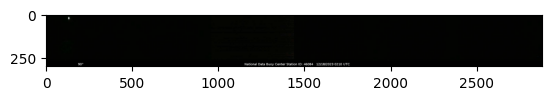

In [66]:
# now grab the newest images for each buoy instead of ten random images
# get the list of files in the images/buoys directory and sort them by date created

# what is the most recent photo (by date created) over all buoys?
# get the list of files in the images/buoys directory
files = glob.glob('../images/buoys/*/*')
# get the most recent file
newest_file = max(files, key=os.path.getctime)
# read the image
image = cv2.imread(newest_file)
# show the image
plt.imshow(image)

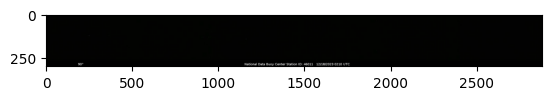

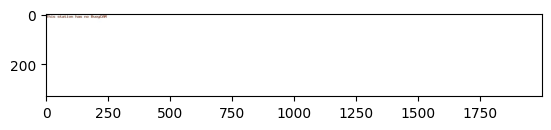

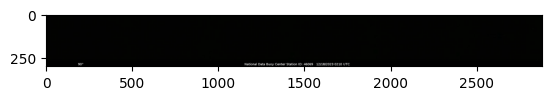

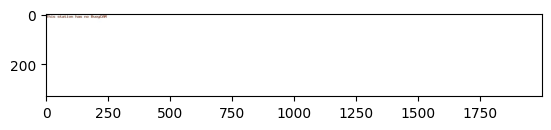

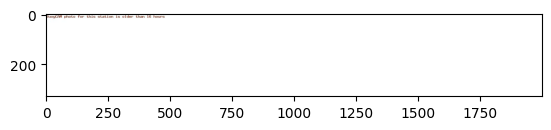

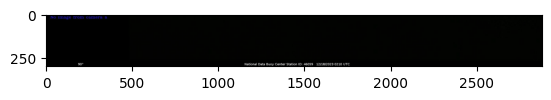

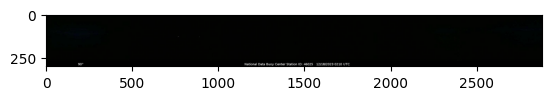

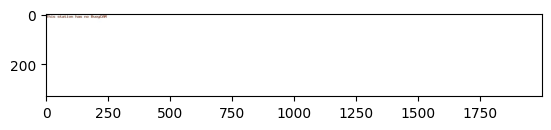

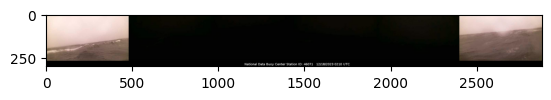

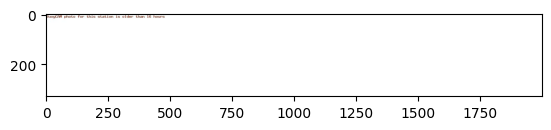

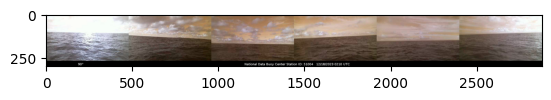

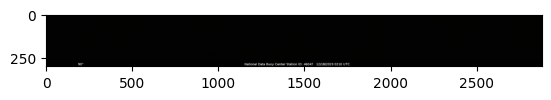

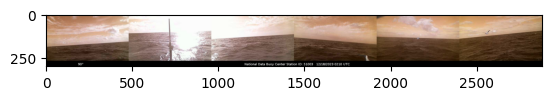

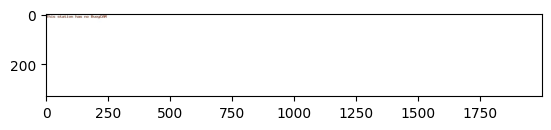

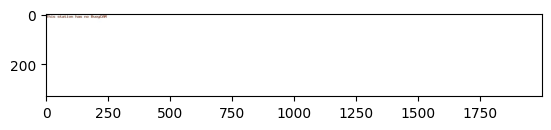

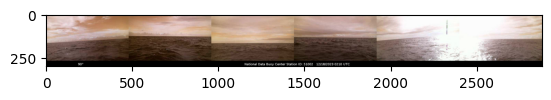

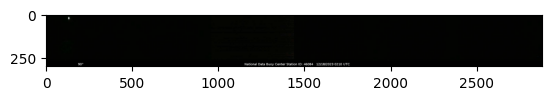

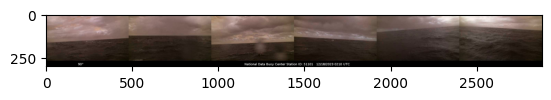

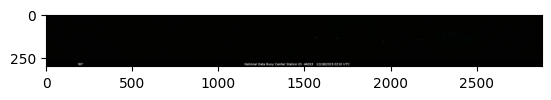

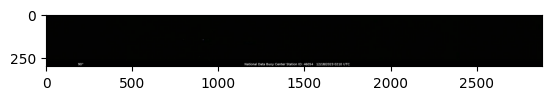

In [67]:
# now grab the newest images for each buoy instead of ten random images
# get the list of files in the images/buoys directory and sort them by date created

# what is the most recent photo (by date created) over all buoys?
# get the list of files in the images/buoys directory
files = glob.glob('../images/buoys/*/*')
# show the twenty most recent images
for file in files[-20:]:
    # read the image
    image = cv2.imread(file)
    # add the image to the blank image
    
    # show the image
    plt.imshow(image)
    plt.show()


  0%|          | 0/32 [00:00<?, ?it/s]

100%|██████████| 32/32 [00:00<00:00, 131.63it/s]

Error reading image
Error reading image
Error reading image
Error reading image
Error reading image
Error reading image
Error reading image
Error reading image
Error reading image
Error reading image


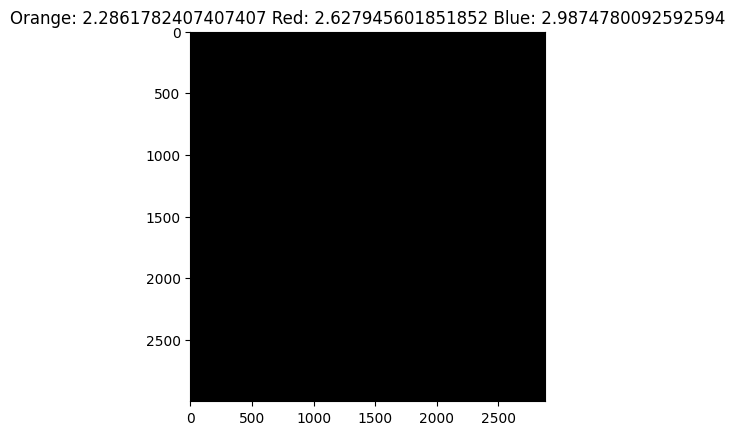

In [68]:
# now grab the newest images for each buoy instead of ten random images
# get the list of files in the images/buoys directory and sort them by date created
from tqdm import tqdm
import time
# what is the most recent photo (by date created) over all buoys?
# get the list of files in the images/buoys directory
sunsets_found = 0 # keep track of how many sunsets we find
files = glob.glob('../images/buoys/*/*')
height, width, channels = cv2.imread(files[0]).shape
# blank_image = np.zeros((height*10, width, channels), np.uint8)
# get the ten images that have the most orange in them
# make the blank image the same size as the images
blank_image = np.zeros((height*10, width, channels), np.uint8)

for file in tqdm(files):
    # read the image
    try:
        image = cv2.imread(file)
        # get the average orange value
        # print(np.mean(image[:,:,2]))
        orange_value = np.mean(image[:,:,2]) # the orange channel is the third channel
        red_value = np.mean(image[:,:,0]) # get the average red value when over 147 then save the image
        blue_value = np.mean(image[:,:,1]) # blue value
        # print(orange_value, red_value, blue_value)
        
        # show the image and annotate it with the orange, red, and blue values
        plt.imshow(image)
        plt.title("Orange: " + str(orange_value) + " Red: " + str(red_value) + " Blue: " + str(blue_value))
        # plt.show()
        # time.sleep(1)
        
        
        # if the orange value is greater than 150 add the image to the blank image
        # a sunset will have the colors red, orange, and yellow
        # a sunset will have a high orange value and a high red value
        # a sunset will have a low blue value
        if orange_value > 100 and red_value > 150 and blue_value >60:
            # add the image as a new row to the blank image
            blank_image[sunsets_found*height:(sunsets_found+1)*height, 0:width] = image
        
            # show progress by printing out the blank image
            cv2.imwrite('../images/tapestry.png', blank_image)
            #print("Sunset found!")
            sunsets_found += 1
        if sunsets_found == 10:
            
            cv2.imwrite('../images/tapestry.png', blank_image)
            break
    except:
        print("Error reading image")
        pass
# show the blank tapestry
plt.imshow(blank_image)


The most recent file is ../images/buoys/46084/46084_20231218030922.jpg


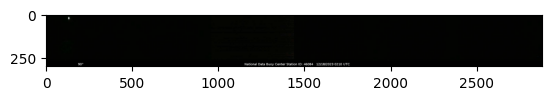

In [69]:
# now grab the newest images for each buoy instead of ten random images
# get the list of files in the images/buoys directory and sort them by date created

# what is the most recent photo (by date created) over all buoys?
# get the list of files in the images/buoys directory
files = glob.glob('../images/buoys/*/*')
# get the most recent file
print("The most recent file is {}".format(max(files, key=os.path.getctime)))

newest_file = max(files, key=os.path.getctime)
# read the image
image = cv2.imread(newest_file)
# show the image
plt.imshow(image)


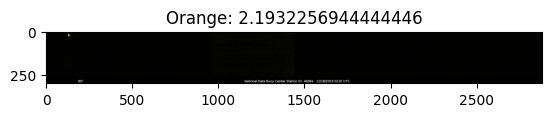

In [70]:
# get the list of files in the images/buoys directory
files = glob.glob('../images/buoys/*/*')
# get the most recent file
newest_file = max(files, key=os.path.getctime)
# read the image
image = cv2.imread(newest_file)
# get the average orange value
orange_value = np.mean(image[:,:,2]) # the orange channel is the third channel
# show the image and annotate it with the orange value
plt.imshow(image)
plt.title("Orange: " + str(orange_value))
plt.show()

100%|██████████| 32/32 [00:00<00:00, 278.85it/s]


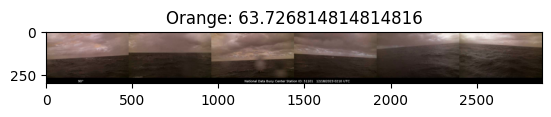

In [71]:
# find the newest image that is not mainly black pixels. This will be the most recent image of one of the buoys in the folders in the images/buoys directory
# get the list of files in the images/buoys directory
files = glob.glob('../images/buoys/*/*')
# get the list of the paths to each of the latest images
latest_images = []
for file in tqdm(files):
    # read the image
    image = cv2.imread(file)
    # get the average orange value
    orange_value = np.mean(image[:,:,2]) # the orange channel is the third channel
    
    #* The logic
    #^ if the orange value is greater than 150 add the image to the black images list which we don't want
    if orange_value > 150:
        continue
    #^ we also don't want mainly white images which have orange values less than 10
    if orange_value < 10:
        continue
    #^ if the orange value is between 10 and 150 then add it to the list of latest images
    latest_images.append(file)

# get the most recent image that is not mainly black pixels
newest_file = max(latest_images, key=os.path.getctime)
# read the image
image = cv2.imread(newest_file)
# get the average orange value
orange_value = np.mean(image[:,:,2]) # the orange channel is the third channel
# show the image and annotate it with the orange value
plt.imshow(image)
plt.title("Orange: " + str(orange_value))
plt.show()

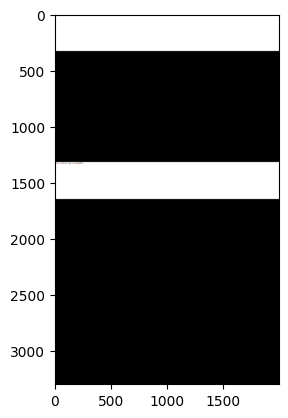

In [72]:
newest_images = get_newest_images()

# with cv2 put the images in a grid with one column and ten rows and save the image as 'tapestry.png' in the images directory
# get the height and width of the first image
height, width, channels = cv2.imread(newest_images[0]).shape
# height -= 25 # crop out the bottom 25 pixels
# create a blank image
blank_image = np.zeros((height*10, width, channels), np.uint8)
# for each image
for i in range(len(newest_images)):
    try:
        # get the image
        image = cv2.imread(newest_images[i])
        # crop out the bottom
        # image = crop_out_the_bottom(image)
        # add the image to the blank image
        blank_image[i*height:(i+1)*height, 0:width] = image
    except:
        pass
# save the blank image
cv2.imwrite('../images/tapestry.png', blank_image)
# show the blank image
plt.imshow(blank_image)

100%|██████████| 32/32 [00:00<00:00, 142.70it/s]

Error reading image
Error reading image
Error reading image
Error reading image
Error reading image
Error reading image
Error reading image
Error reading image
Error reading image
Error reading image


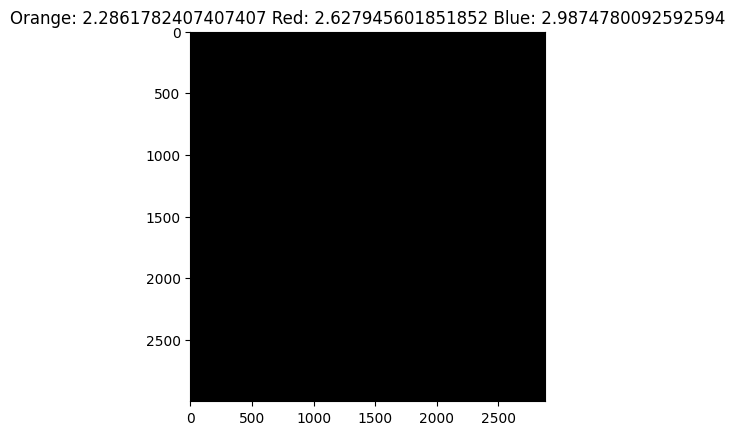

In [73]:
# now grab the newest images for each buoy instead of ten random images
# get the list of files in the images/buoys directory and sort them by date created
from tqdm import tqdm
import time
# what is the most recent photo (by date created) over all buoys?
# get the list of files in the images/buoys directory
sunsets_found = 0 # keep track of how many sunsets we find
files = glob.glob('../images/buoys/*/*')
height, width, channels = cv2.imread(files[0]).shape
# blank_image = np.zeros((height*10, width, channels), np.uint8)
# get the ten images that have the most orange in them
# make the blank image the same size as the images
blank_image = np.zeros((height*10, width, channels), np.uint8)
cv2.imwrite('../images/tapestry.png', blank_image)
for file in tqdm(files):
    # read the image
    try:
        image = cv2.imread(file)
        # get the average orange value
        # print(np.mean(image[:,:,2]))
        orange_value = np.mean(image[:,:,2]) # the orange channel is the third channel
        red_value = np.mean(image[:,:,0]) # get the average red value when over 147 then save the image
        blue_value = np.mean(image[:,:,1]) # blue value
        # print(orange_value, red_value, blue_value)
        
        # show the image and annotate it with the orange, red, and blue values
        plt.imshow(image)
        plt.title("Orange: " + str(orange_value) + " Red: " + str(red_value) + " Blue: " + str(blue_value))
        # plt.show()
        # time.sleep(1)
        
        
        # if the orange value is greater than 150 add the image to the blank image
        # a sunset will have the colors red, orange, and yellow
        # a sunset will have a high orange value and a high red value
        # a sunset will have a low blue value
        if orange_value > 150 and red_value > 150:
            # add the image as a new row to the blank image
            blank_image[sunsets_found*height:(sunsets_found+1)*height, 0:width] = image
        
            # show progress by printing out the blank image
            cv2.imwrite('../images/tapestry.png', blank_image)
            #print("Sunset found!")
            sunsets_found += 1
        if sunsets_found == 10:
            
            cv2.imwrite('../images/tapestry.png', blank_image)
            break
    except:
        print("Error reading image")
        pass
# show the blank tapestry
plt.imshow(blank_image)


In [74]:
# now grab the newest images for each buoy instead of ten random images
# get the list of files in the images/buoys directory and sort them by date created
from tqdm import tqdm
import time
# what is the most recent photo (by date created) over all buoys?
# get the list of files in the images/buoys directory

def deal_with_white_images_and_populate_tapestry():
    sunsets_found = 0 # keep track of how many sunsets we find
    files = glob.glob('../images/buoys/*/*')
    height, width, channels = cv2.imread(files[0]).shape
    # blank_image = np.zeros((height*10, width, channels), np.uint8)
    # get the ten images that have the most orange in them
    # make the blank image the same size as the images
    blank_image = np.zeros((height*10, width, channels), np.uint8)
    cv2.imwrite('../images/tapestry.png', blank_image)

    # shuffle the files so we don't always get the same ten images
    random.shuffle(files)


    for file in tqdm(files):
        # read the image
        try:
            image = cv2.imread(file)
            # get the average orange value
            # print(np.mean(image[:,:,2]))
            orange_value = np.mean(image[:,:,2]) # the orange channel is the third channel
            
            red_value = np.mean(image[:,:,0]) # get the average red value when over 147 then save the image
            
                
            # daytime images always have higher values than 10 for all three channels
            # values less than 10 are usually night
            # skip the image if it is night
            if orange_value < 10 and red_value < 10: # higher than 250 for all means it is a white imag
                continue
            # if the values are all higher than 250 then it is a white image and we want to remove it
            if orange_value > 250 and red_value > 250:
                os.remove(file)
                print("Removed white image")
                continue
            
            blue_value = np.mean(image[:,:,1]) # blue value
            # print(orange_value, red_value, blue_value)
            # show the image and annotate it with the orange, red, and blue values
            # plt.imshow(image)
            # plt.title("Orange: " + str(orange_value) + " Red: " + str(red_value) + " Blue: " + str(blue_value))
            # plt.show()
            
            # if we reached this point the image can be added to the tapestry unless the tapestry has already been filled then just keep going without adding the image
            if sunsets_found == 10:
                continue
            else:
                blank_image[sunsets_found*height:(sunsets_found+1)*height, 0:width] = image
                # show progress by printing out the blank image
                cv2.imwrite('../images/tapestry.png', blank_image)
                #print("Sunset found!")
                sunsets_found += 1 # increment the number of sunsets found

        except:
            print("Error reading image")
            pass
